In [93]:
"""
Created on: Tue. 9 Aug. 2022
Updated on: Wed. 10 Aug. 2022
Updated on: Tue. 16 Aug. 2022
Updated on: Wed. 31 Aug. 2022
Author: Mélina Verger
"""

# To interact with the operating system
import os

# For data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

# To make the train-test split
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# To save the trained models
import pickle

# For cross-validation
from sklearn.model_selection import cross_val_score

# Metric
from sklearn.metrics import accuracy_score

# Plotting module
import matplotlib.pyplot as plt

## Reduced data set

In [94]:
studentAll_num_scaled = pd.read_csv("./data/studentAll_num_scaled.csv")

In [95]:
studentAll_num_scaled

,gender,highest_education,imd_band,age_band,disability,num_of_prev_attempts,studied_credits,sum_click,weighted_score,final_result,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1.0,0.75,0.0,1.0,0.0,0.0,0.35,0.038653,0.824000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,1.0,0.5,0.0,0.0,0.05,0.059408,0.654000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.50,0.0,0.5,0.0,0.0,0.05,0.089361,0.763000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,0.0,0.0,0.0,0.05,0.042796,0.550000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.50,0.0,0.5,0.0,0.0,0.05,0.101251,0.669000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19114,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.009736,0.788889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19115,0.0,0.50,0.0,0.0,1.0,0.0,0.00,0.019679,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19116,0.0,0.25,1.0,0.5,0.0,0.0,0.00,0.036954,0.881111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19117,0.0,0.50,1.0,0.0,1.0,0.0,0.00,0.012884,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [96]:
studentAll_num_scaled_reduced = studentAll_num_scaled.loc[studentAll_num_scaled["code_module_BBB"] == 1]

In [97]:
studentAll_num_scaled_reduced.shape

(5118, 34)

In [98]:
studentAll_num_scaled_reduced = studentAll_num_scaled_reduced[["gender", "highest_education", "imd_band", "age_band",  "disability", "num_of_prev_attempts",
"studied_credits", "sum_click", "weighted_score", "final_result"]]

In [99]:
studentAll_num_scaled_reduced.shape

(5118, 10)

In [100]:
studentAll_num_scaled_reduced

,gender,highest_education,imd_band,age_band,disability,num_of_prev_attempts,studied_credits,sum_click,weighted_score,final_result
588,0.0,0.25,1.0,0.0,0.0,0.333333,0.050,0.006629,0.667600,0.0
589,0.0,0.25,1.0,0.0,0.0,0.000000,0.150,0.106098,0.605100,1.0
590,1.0,0.25,0.0,0.0,0.0,0.000000,0.150,0.079253,0.654568,0.0
591,1.0,0.50,1.0,0.5,0.0,0.000000,0.050,0.244635,0.639200,1.0
592,0.0,0.50,1.0,0.5,0.0,0.333333,0.150,0.029207,0.803333,1.0
...,...,...,...,...,...,...,...,...,...,...
5701,0.0,0.75,1.0,0.5,0.0,0.000000,0.050,0.031941,0.682178,1.0
5702,0.0,0.75,0.0,0.5,0.0,0.000000,0.075,0.099718,0.700495,1.0
5703,0.0,0.25,0.0,0.5,1.0,0.000000,0.150,0.056674,0.667327,1.0
5704,0.0,0.25,0.0,0.5,0.0,0.000000,0.050,0.029663,0.562376,0.0


In [101]:
# Gender imbalance
round(studentAll_num_scaled_reduced["gender"].value_counts()[0] / (studentAll_num_scaled_reduced["gender"].value_counts()[0] + studentAll_num_scaled_reduced["gender"].value_counts()[1]) * 100, 2)

88.53

## Machine learning

### X-y split

In [102]:
X = studentAll_num_scaled_reduced.drop(columns="final_result")
y = studentAll_num_scaled_reduced["final_result"]

In [103]:
# Positive class imbalance
round(y.value_counts()[1] / (y.value_counts()[1] + y.value_counts()[0]) * 100, 2)

59.3

### Train-test split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y, shuffle=True)

In [105]:
pd.DataFrame(X_train).to_csv("./data/X_train.csv", index=False)
pd.DataFrame(X_test).to_csv("./data/X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("./data/y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("./data/y_test.csv", index=False)

In [106]:
print(X_train.shape)
print(X_test.shape)

(4094, 9)
(1024, 9)


### Out-of-the-box classifiers

In [107]:
if not os.path.exists("./models"):
    os.mkdir("models")
else:
    print("The folder 'models' already exists." )

The folder 'models' already exists.


#### Logistic regression

In [108]:
clf_lr = LogisticRegression(random_state=0)
clf_svc = LinearSVC(random_state=0)
clf_knearest = KNeighborsClassifier()
clf_dt = DecisionTreeClassifier(random_state=0)

In [109]:
clf_lr.fit(X_train, y_train)
pickle.dump(clf_lr, open("./models/clf_lr", "wb"))
print(round(clf_lr.score(X_train, y_train), 2))
print(round(clf_lr.score(X_test, y_test), 2))

scores_train = cross_val_score(clf_lr, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))

print(f"Accuracy on the test set: {accuracy_score(y_test, clf_lr.predict(X_test))}")


0.62
0.62
0.62 accuracy with a standard deviation of 0.01
Accuracy on the test set: 0.6201171875


##### LR - feature importance

In [110]:
clf_lr.coef_

array([[ 0.01441819, -0.2441741 , -0.19571785,  0.03235157, -0.18550186,
        -1.25372016, -1.17108086,  3.62610636,  0.7896661 ]])

In [111]:
pd.DataFrame(clf_lr.coef_, columns=X_train.columns, index=["coef"]).T

,coef
gender,0.014418
highest_education,-0.244174
imd_band,-0.195718
age_band,0.032352
disability,-0.185502
num_of_prev_attempts,-1.253720
studied_credits,-1.171081
sum_click,3.626106
weighted_score,0.789666


In [112]:
pd.DataFrame(clf_lr.coef_, columns=X_train.columns, index=["coef"]).T.sort_values(by='coef', axis=0, ascending=False, key=abs)

,coef
sum_click,3.626106
num_of_prev_attempts,-1.253720
studied_credits,-1.171081
weighted_score,0.789666
highest_education,-0.244174
imd_band,-0.195718
disability,-0.185502
age_band,0.032352
gender,0.014418


(-2.5, 2.0)

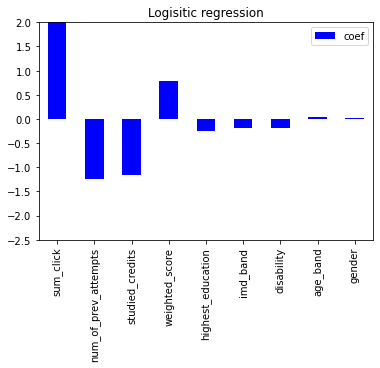

In [113]:
pd.DataFrame(clf_lr.coef_, columns=X_train.columns, index=["coef"]).T.sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Logisitic regression")
plt.ylim((-2.5,2))

#### SVC

In [114]:
clf_svc.fit(X_train, y_train)
pickle.dump(clf_svc, open("./models/clf_svc", "wb"))
print(round(clf_svc.score(X_train, y_train), 2))
print(round(clf_svc.score(X_test, y_test), 2))

scores_train = cross_val_score(clf_svc, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))

print(f"Accuracy on the test set: {accuracy_score(y_test, clf_svc.predict(X_test))}")

0.62
0.62
0.62 accuracy with a standard deviation of 0.01
Accuracy on the test set: 0.619140625


##### SVC - Feature importance

(-2.5, 2.0)

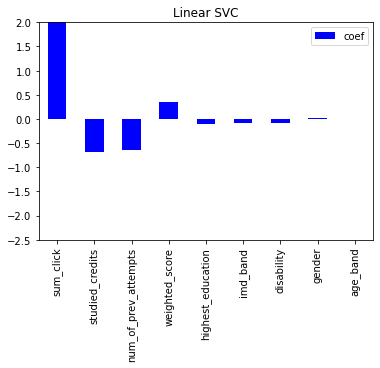

In [115]:
pd.DataFrame(clf_svc.coef_, columns=X_train.columns, index=["coef"]).T.sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Linear SVC")
plt.ylim((-2.5,2))

#### K-nearest neighbors

In [116]:
clf_knearest.fit(X_train, y_train)
pickle.dump(clf_knearest, open("./models/clf_knearest", "wb"))
print(round(clf_knearest.score(X_train, y_train), 2))
print(round(clf_knearest.score(X_test, y_test), 2))

scores_train = cross_val_score(clf_knearest, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))

print(f"Accuracy on the test set: {accuracy_score(y_test, clf_knearest.predict(X_test))}")

0.75
0.61
0.64 accuracy with a standard deviation of 0.01
Accuracy on the test set: 0.6064453125


/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

#### Decision tree

In [117]:
clf_dt.fit(X_train, y_train)
pickle.dump(clf_dt, open("./models/clf_dt", "wb"))
print(round(clf_dt.score(X_train, y_train), 2))
print(round(clf_dt.score(X_test, y_test), 2))

scores_train = cross_val_score(clf_dt, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))

print(f"Accuracy on the test set: {accuracy_score(y_test, clf_dt.predict(X_test))}")

1.0
0.61
0.63 accuracy with a standard deviation of 0.02
Accuracy on the test set: 0.6064453125


##### DT - Feature importance

In [118]:
clf_dt.feature_importances_

array([0.01791   , 0.04461992, 0.02998414, 0.02253404, 0.01178548,
       0.02661093, 0.03417803, 0.3871948 , 0.42518268])

In [119]:
pd.DataFrame(clf_dt.feature_importances_, index=X_train.columns, columns=["coef"])

,coef
gender,0.017910
highest_education,0.044620
imd_band,0.029984
age_band,0.022534
disability,0.011785
num_of_prev_attempts,0.026611
studied_credits,0.034178
sum_click,0.387195
weighted_score,0.425183


(-2.5, 2.0)

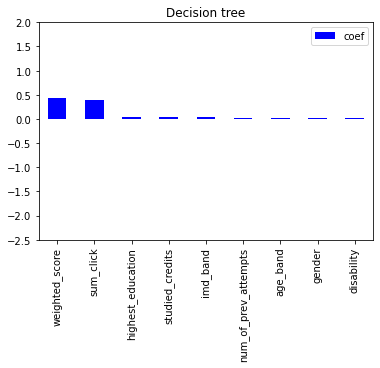

In [120]:
pd.DataFrame(clf_dt.feature_importances_, index=X_train.columns, columns=["coef"]).sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Decision tree")
plt.ylim((-2.5,2))